## Import libraries

In [1]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/MP'
os.chdir(proj_path)

In [4]:
train_csv_path = os.path.join(proj_path, 'train_3D.csv')
test_csv_path = os.path.join(proj_path, 'test_3D.csv')

## Read data from csv to pandas dataframe

In [5]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [6]:
train_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,839,Autistic,0.511593,0.709910,-0.040127,0.517181,0.670308,-0.168715,0.515403,...,-0.057532,0.587559,0.500262,-0.077599,0.768636,0.474503,-0.021161,0.784336,0.468965,-0.021392
1,/content/drive/MyDrive/Magnimind/Face_detectio...,825,Autistic,0.566339,0.733220,-0.065258,0.575596,0.677747,-0.127426,0.568713,...,0.001300,0.609449,0.556148,-0.015839,0.738344,0.541875,0.039996,0.751471,0.531839,0.042270
2,/content/drive/MyDrive/Magnimind/Face_detectio...,817,Autistic,0.437217,0.744490,-0.077209,0.426740,0.685478,-0.165941,0.433244,...,-0.018598,0.488665,0.551752,-0.038808,0.656447,0.535078,0.003090,0.674554,0.525373,0.003349
3,/content/drive/MyDrive/Magnimind/Face_detectio...,845,Autistic,0.533727,0.797597,-0.053682,0.549781,0.762331,-0.169223,0.540980,...,-0.035548,0.601406,0.623819,-0.057016,0.766676,0.603243,0.013871,0.782729,0.596054,0.015662
4,/content/drive/MyDrive/Magnimind/Face_detectio...,844,Autistic,0.524054,0.774706,-0.052582,0.505436,0.710976,-0.152662,0.512779,...,-0.039194,0.528307,0.568924,-0.058087,0.683886,0.525732,-0.016595,0.697740,0.517121,-0.017281


In [7]:
test_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,100,Autistic,0.727391,0.710138,-0.117875,0.753489,0.581854,-0.193980,0.723864,...,0.048919,0.737665,0.421433,0.016144,0.890724,0.401811,0.169311,0.903891,0.394724,0.177334
1,/content/drive/MyDrive/Magnimind/Face_detectio...,108,Autistic,0.457443,0.710929,-0.091133,0.437796,0.633989,-0.193647,0.445459,...,-0.020685,0.482040,0.471925,-0.044690,0.660659,0.437236,0.013672,0.679693,0.424461,0.015152
2,/content/drive/MyDrive/Magnimind/Face_detectio...,106,Autistic,0.452099,0.779923,-0.042830,0.453784,0.726497,-0.181251,0.455887,...,-0.063696,0.546055,0.521134,-0.084867,0.749610,0.499630,-0.035831,0.771000,0.490222,-0.036383
3,/content/drive/MyDrive/Magnimind/Face_detectio...,1,Autistic,0.457504,0.754957,-0.085740,0.470419,0.687706,-0.211908,0.467041,...,-0.034361,0.565713,0.535771,-0.059295,0.783299,0.529403,0.008190,0.804902,0.522787,0.009052
4,/content/drive/MyDrive/Magnimind/Face_detectio...,103,Autistic,0.362426,0.740446,-0.046425,0.366750,0.668341,-0.156865,0.372543,...,-0.048113,0.491366,0.545638,-0.066218,0.686309,0.559731,-0.032427,0.705237,0.556214,-0.034047


In [8]:
train_df['label'].value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [9]:
train_df[train_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


In [10]:
test_df['label'].value_counts()

Autistic        150
Non_Autistic    150
Name: label, dtype: int64

In [11]:
test_df[test_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


## Setting input features and output features

In [12]:
X = train_df['img_path']
y = train_df['label']

In [13]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [14]:
#y = y.map({'Autistic': 1, 'Non_Autistic': 0})

In [15]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y, shuffle=True, random_state=72)

In [17]:
X_test = test_df['img_path']
y_test = test_df['label']
#y_test = y_test.map({'Autistic': 1, 'Non_Autistic': 0})

In [18]:
# Initializing random_state
random_state = 72
seed = 72

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
from PIL import Image
from skimage import io, filters
from scipy import ndimage
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [20]:
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [21]:
# Input shape required by VGG16
IMAGE_WIDTH=512
IMAGE_HEIGHT=512
IMAGE_CHANNELS=3
INP_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
IMAGE_SIZE=(IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 64

In [22]:

# Load the VGG16 model without the top classification layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=INP_SHAPE)

# Freeze the layers of VGG16 model to not train them during the fine-tuning
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new top model to put on top of the VGG16
x = vgg_model.output
x = GlobalAveragePooling2D()(x)  # Flatten the output of the conv layers

# Add new layers
x = Dense(128, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.6)(x)

x = Dense(64, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.6)(x)

x = Dense(32, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.6)(x)

# Add a final output layer for binary classification with a sigmoid activation
predictions = Dense(1, activation='sigmoid')(x)

# This is the new model we will train
model = Model(inputs=vgg_model.input, outputs=predictions)


58889256/58889256 [==============================] - 2s 0us/step


In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [24]:
vggmodel_weights_filepath = 'vggmodel_best.hdf5'
if os.path.exists(vggmodel_weights_filepath):
    model.load_weights(vggmodel_weights_filepath)

In [25]:
from keras import backend as K

def f1_score(y_true, y_pred):
    # Calculating the number of true positives
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    # Calculating the number of possible positives (i.e., the total number of actual positives)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    # Calculating the number of predicted positives
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    # Adding epsilon to the denominator to prevent division by zero
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    # Calculating the F1 score
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_val

In [26]:
from keras.optimizers import Adam
# Set a custom learning rate
learning_rate = 0.0005

In [27]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       ])

In [28]:
callbacks = []

# Saving checkpoints
checkpoint = ModelCheckpoint(vggmodel_weights_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks.append(checkpoint)

# Define early_stopping.
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=8,
                               verbose=1,
                               restore_best_weights=True)
callbacks.append(early_stopping)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=5)
callbacks.append(reduce_lr)

In [29]:
#set a seed
seed = 72
np.random.seed(seed)

In [30]:
# Concatenate X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)
# Concatenate X_val and y_val
val_df = pd.concat([X_val, y_val], axis=1)
# Concatenate X_test and y_test
test_df = pd.concat([X_test, y_test], axis=1)

In [31]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   #shear_range=0.2,
                                   rotation_range=15,
                                   #zoom_range=0.3,
                                   brightness_range=[0.7, 1.0],
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='img_path',
                                                    y_col='label',
                                                    interpolation='bicubic',
                                                    seed=seed,
                                                    # all images will be resized to configured target size,
                                                    target_size=IMAGE_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    classes=['Non_Autistic', 'Autistic'],
                                                    class_mode='binary',
                                                    )


Found 1768 validated image filenames belonging to 2 classes.


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Batch size is 64
grid_size = 8  # (8x8 grid)

# Initialize an empty array for the final stitched image
stitched_image = np.zeros((grid_size * images.shape[1], grid_size * images.shape[2], 3))

for i in range(grid_size):
    for j in range(grid_size):
        img = images[i * grid_size + j]
        img = np.clip(img, 0, 255).astype('uint8')

        stitched_image[i * images.shape[1]:(i+1) * images.shape[1], j * images.shape[2]:(j+1) * images.shape[2]] = img

# Display the stitched image
plt.figure(figsize=(20,20))
plt.imshow(stitched_image.astype('uint8'))
plt.axis('off')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [33]:
# Batch size is 64
grid_size = 8  # (8x8 grid)

# Initialize an empty array for the final stitched image
stitched_image_preprocessed_rev = np.zeros((grid_size * images.shape[1], grid_size * images.shape[2], 3))

for i in range(grid_size):
    for j in range(grid_size):
        img = images[i * grid_size + j]
        # Reverse the preprocessing steps
        img = img + [123.68, 116.779, 103.939]  # Add the mean values used by VGG16 preprocessing
        img = img[:, :, ::-1]  # Convert BGR back to RGB (since VGG16 preprocess input changes the channel order)
        img = np.clip(img, 0, 255).astype('uint8')

        stitched_image_preprocessed_rev[i * images.shape[1]:(i+1) * images.shape[1], j * images.shape[2]:(j+1) * images.shape[2]] = img

# Display the stitched image
plt.figure(figsize=(20,20))
plt.imshow(stitched_image_preprocessed_rev.astype('uint8'))
plt.axis('off')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [34]:
# preprocess_input from VGG
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                x_col='img_path',
                                                y_col='label',
                                                seed=seed,
                                                # all images will be resized to configured target size,
                                                target_size=IMAGE_SIZE,
                                                batch_size=BATCH_SIZE,
                                                classes=['Non_Autistic', 'Autistic'],
                                                class_mode='binary',
                                                )

Found 312 validated image filenames belonging to 2 classes.


In [35]:
# preprocess_input from VGG
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col='img_path',
                                                  y_col='label',
                                                  seed=seed,
                                                  # all images will be resized to configured target size,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  classes=['Non_Autistic', 'Autistic'],
                                                  shuffle=False
                                                )

Found 300 validated image filenames belonging to 2 classes.


In [36]:
class_indices = train_generator.class_indices
label_names = list(class_indices.keys())

In [37]:
class_indices

{'Non_Autistic': 0, 'Autistic': 1}

In [38]:
label_names

['Non_Autistic', 'Autistic']

In [39]:
y_train.value_counts()

Autistic        1079
Non_Autistic     689
Name: label, dtype: int64

In [40]:
from sklearn.utils import class_weight

# Compute class weight
weights = class_weight.compute_class_weight('balanced', classes=label_names, y=y_train)

class_weight_dict = {i: weight for i, weight in enumerate(weights)}
class_weight_dict

{0: 1.2830188679245282, 1: 0.8192771084337349}

In [41]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=100,
                    callbacks=callbacks,
                    class_weight=class_weight_dict,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 0.9212 - accuracy: 0.5051 - precision: 0.6014 - recall: 0.5607 
Epoch 1: val_loss improved from inf to 0.69455, saving model to vggmodel_best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 1342s 46s/step - loss: 0.9212 - accuracy: 0.5051 - precision: 0.6014 - recall: 0.5607 - val_loss: 0.6945 - val_accuracy: 0.5673 - val_precision: 0.6750 - val_recall: 0.5654 - lr: 5.0000e-04
Epoch 2/100
28/28 [==============================] - ETA: 0s - loss: 0.7950 - accuracy: 0.5662 - precision: 0.6677 - recall: 0.5755
Epoch 2: val_loss improved from 0.69455 to 0.62973, saving model to vggmodel_best.hdf5
28/28 [==============================] - 184s 7s/step - loss: 0.7950 - accuracy: 0.5662 - precision: 0.6677 - recall: 0.5755 - val_loss: 0.6297 - val_accuracy: 0.6506 - val_precision: 0.6589 - val_recall: 0.8901 - lr: 5.0000e-04
Epoch 3/100
28/28 [==============================] - ETA: 0s - loss: 0.8074 - accuracy: 0.5458 - precision: 0.6478 - recall: 0.5607
Epoch 3: val_loss improved from 0.62973 to 0.62221, saving model to vggmodel_best.hdf5
28/28 [==============================] - 187s 7s/step - loss: 0.8074 - accuracy: 0.5458 - precision: 0

In [42]:
model.load_weights("vggmodel_best.hdf5")

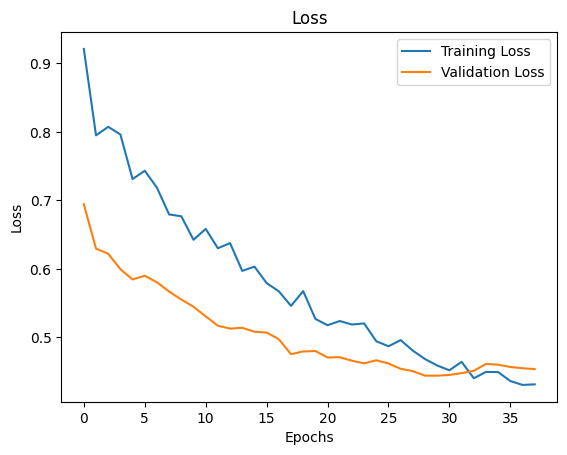

In [43]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

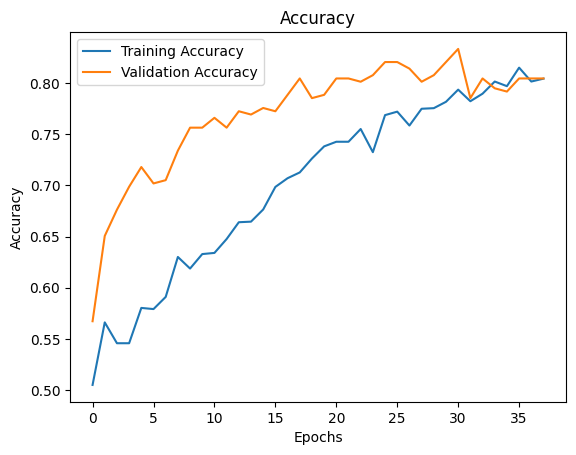

In [44]:
# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

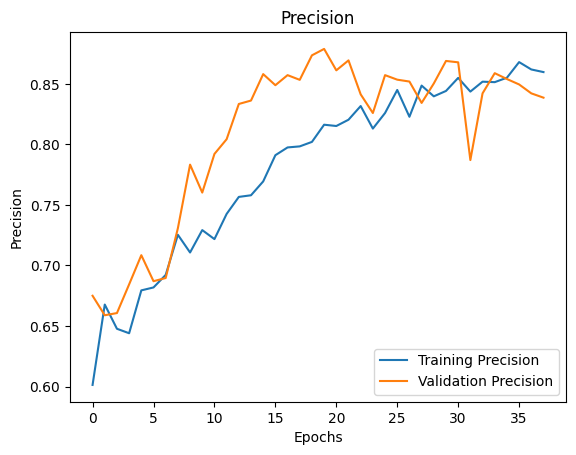

In [45]:
# Plot the precision curve
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

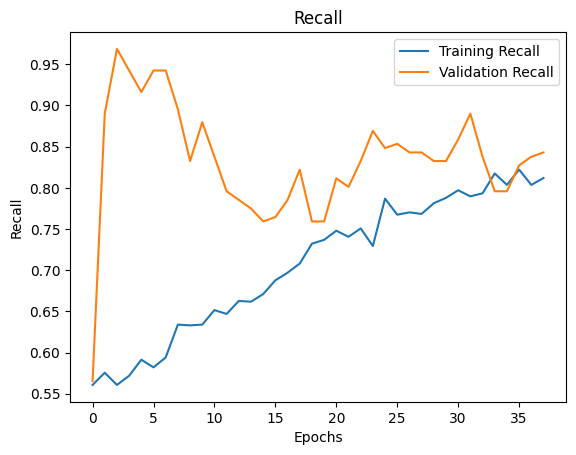

In [46]:
# Plot the recall curve
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [47]:
# Evaluate model on train data
train_eval_results = model.evaluate(train_generator)
print(f'Accuracy: {train_eval_results[1]}')
precision = train_eval_results[2]
recall = train_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

28/28 [==============================] - 168s 6s/step - loss: 0.3868 - accuracy: 0.8331 - precision: 0.8992 - recall: 0.8184
Accuracy: 0.8331447839736938
Precision: 0.8991853594779968
Recall: 0.8183503150939941
F1-score: 0.8568656047742336


In [48]:
# Evaluate model on val data
val_eval_results = model.evaluate(val_generator)
print(f'Accuracy: {val_eval_results[1]}')
precision = val_eval_results[2]
recall = val_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

5/5 [==============================] - 8s 1s/step - loss: 0.4443 - accuracy: 0.8205 - precision: 0.8689 - recall: 0.8325
Accuracy: 0.8205128312110901
Precision: 0.868852436542511
Recall: 0.8324607610702515
F1-score: 0.8502673835679594


In [49]:
# Evaluate model on test data
test_eval_results = model.evaluate(test_generator)
print(f'Accuracy: {test_eval_results[1]}')
precision = test_eval_results[2]
recall = test_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

5/5 [==============================] - 169s 42s/step - loss: 0.5051 - accuracy: 0.7833 - precision: 0.7640 - recall: 0.8200
Accuracy: 0.7833333611488342
Precision: 0.7639751434326172
Recall: 0.8199999928474426
F1-score: 0.790996774888273


In [50]:
# Predict labels for the images in train_generator
train_predicted_probs = model.predict(train_generator)
train_predicted_labels = (train_predicted_probs > 0.5).astype("int32") # Assuming you have a binary classification problem

# Create a dataframe using img_path and predicted labels
train_predicted_df = pd.DataFrame({
    'img_path': train_generator.filenames,
    'predicted_probs': train_predicted_probs.reshape(-1),
    'predicted_label': train_predicted_labels.reshape(-1)
})

# Merge with train_df
merged_train_df = pd.merge(train_df, train_predicted_df, on='img_path', how='left')
merged_train_df.to_csv('train_results.csv')

28/28 [==============================] - 176s 6s/step


In [51]:
# Predict labels for the images in val_generator
val_predicted_probs = model.predict(val_generator)
val_predicted_labels = (val_predicted_probs > 0.5).astype("int32") # Assuming you have a binary classification problem

# Create a dataframe using img_path and predicted labels
val_predicted_df = pd.DataFrame({
    'img_path': val_generator.filenames,
    'predicted_probs': val_predicted_probs.reshape(-1),
    'predicted_label': val_predicted_labels.reshape(-1)
})

# Merge with val_df
merged_val_df = pd.merge(val_df, val_predicted_df, on='img_path', how='left')
merged_val_df.to_csv('val_results.csv')

5/5 [==============================] - 7s 1s/step


In [52]:
# Predict labels for the images in test_generator
test_predicted_probs = model.predict(test_generator)
test_predicted_labels = (test_predicted_probs > 0.5).astype("int32") # Assuming you have a binary classification problem

# Create a dataframe using img_path and predicted labels
test_predicted_df = pd.DataFrame({
    'img_path': test_generator.filenames,
    'predicted_probs': test_predicted_probs.reshape(-1),
    'predicted_label': test_predicted_labels.reshape(-1)
})

# Merge with test_df
merged_test_df = pd.merge(test_df, test_predicted_df, on='img_path', how='left')
merged_test_df.to_csv('test_results.csv')

5/5 [==============================] - 7s 1s/step


5/5 [==============================] - 6s 1s/step


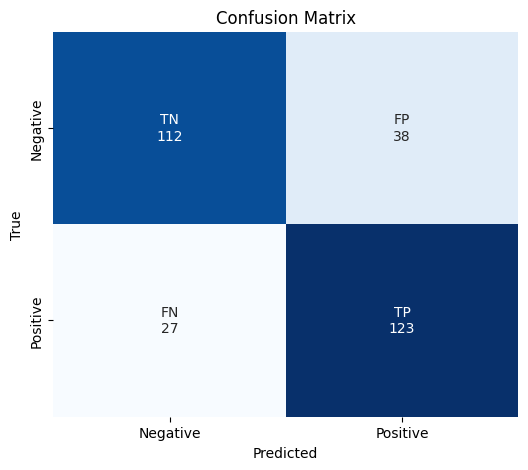

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediction on test set
predictions = model.predict(test_generator)
predictions = predictions.flatten()  # Convert predictions to 1D array if necessary

# Apply 0.5 threshold
predictions_binary = np.where(predictions > 0.5, 1, 0)

# True Labels
# Ensure test_generator labels are in the same order as predictions
true_labels = test_generator.classes

# Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions_binary)

# Extract individual elements
TN, FP, FN, TP = conf_matrix.ravel()

# Create a new confusion matrix with labels
conf_matrix_labelled = np.array([[f"TN\n{TN}", f"FP\n{FP}"], [f"FN\n{FN}", f"TP\n{TP}"]])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
ax = sns.heatmap(conf_matrix, annot=conf_matrix_labelled, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.show()


In [54]:
from sklearn.metrics import classification_report

# Class names
class_names = ['Non_Autistic', 'Autistic']

# Generate classification report
report = classification_report(true_labels, predictions_binary, target_names=class_names)
print(report)

              precision    recall  f1-score   support

Non_Autistic       0.81      0.75      0.78       150
    Autistic       0.76      0.82      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

